# Tables to Idioms

### Acknowledgement 

Slides created by and for:
<cite>Munzner, T. (2014). Visualization analysis and design. CRC press.</cite> {cite}`munzner2014visualization`

Used by permission of the author. 

Image from:
<cite>Wickham, H. (2010). A layered grammar of graphics. Journal of Computational and Graphical Statistics, 19(1), 3-28.</cite> {cite}`wickham2010layered`

```{bibliography}
```



### First the Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
data = []
data=pd.read_csv(url)
data = data.dropna() # removed NAs with 0s

### Remove the United States entries

data = data[data.location != "United States"]

data.total_vaccinations = data.total_vaccinations/100000
data.total_distributed = data.total_distributed/100000
data.people_vaccinated = data.people_vaccinated/100000

In [2]:
data.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
282,2021-10-21,Alabama,47.32829,69.9977,26.37734,44.16,96.53,2165154.0,53.80,142.76,9910.0,9029.0,1841.0,0.676,134615.0,2.75
283,2021-10-22,Alabama,47.42444,70.4527,26.44229,44.26,96.72,2170323.0,53.93,143.69,9615.0,9226.0,1882.0,0.673,138996.0,2.83
284,2021-10-23,Alabama,47.59947,70.6248,26.48588,44.36,97.08,2174923.0,54.02,144.04,17503.0,10252.0,2091.0,0.674,147525.0,3.01
285,2021-10-24,Alabama,47.66186,70.6178,26.50133,44.39,97.21,2176540.0,54.05,144.02,6239.0,8961.0,1828.0,0.675,150656.0,3.07
286,2021-10-25,Alabama,47.73728,70.5884,26.52037,44.42,97.36,2177980.0,54.09,143.96,7542.0,9136.0,1863.0,0.676,154781.0,3.16


### Acknowledgement 

<cite>Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]</cite>
    
Original Link: https://github.com/owid/covid-19-data (Accessed 3/11/2021)
Source Link: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations 


<cite>Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. IEEE Annals of the History of Computing, 9(03), 90-95.</cite>

### Today's and Yesterday's date and data

In [3]:
from datetime import datetime, timedelta

todaysDate = datetime.today()
yesterdaysDate = todaysDate  - timedelta(days=1)
yesterdaysDate = yesterdaysDate.strftime('%Y-%m-%d')
twoDays = todaysDate - timedelta(days=2)
twoDays = twoDays.strftime('%Y-%m-%d')

data[data.date==yesterdaysDate].head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
384,2022-01-31,Alabama,59.60126,88.97300,30.00205,49.46,121.56,2425057.0,61.19,181.46,3779.0,7091.0,1446.0,0.670,800020.0,16.32
770,2022-01-31,Alaska,10.69009,13.91705,4.96628,58.39,146.13,427182.0,67.89,190.24,1957.0,1020.0,1394.0,0.768,168834.0,23.08
1156,2022-01-31,American Samoa,0.83602,0.91010,0.42097,78.26,176.41,37089.0,88.83,192.04,0.0,87.0,1836.0,0.919,5044.0,10.64
1542,2022-01-31,Arizona,111.83491,135.48220,51.05550,58.84,153.65,4282544.0,70.14,186.13,15075.0,17788.0,2444.0,0.825,1601100.0,22.00
1928,2022-01-31,Arkansas,40.04380,56.12120,19.62479,52.73,132.69,1591368.0,65.03,185.97,2603.0,4445.0,1473.0,0.714,577188.0,19.13


![Scatterplot Description](https://raw.githubusercontent.com/dudaspm/JupyterLab-Python/main/images/scatterplot.PNG)
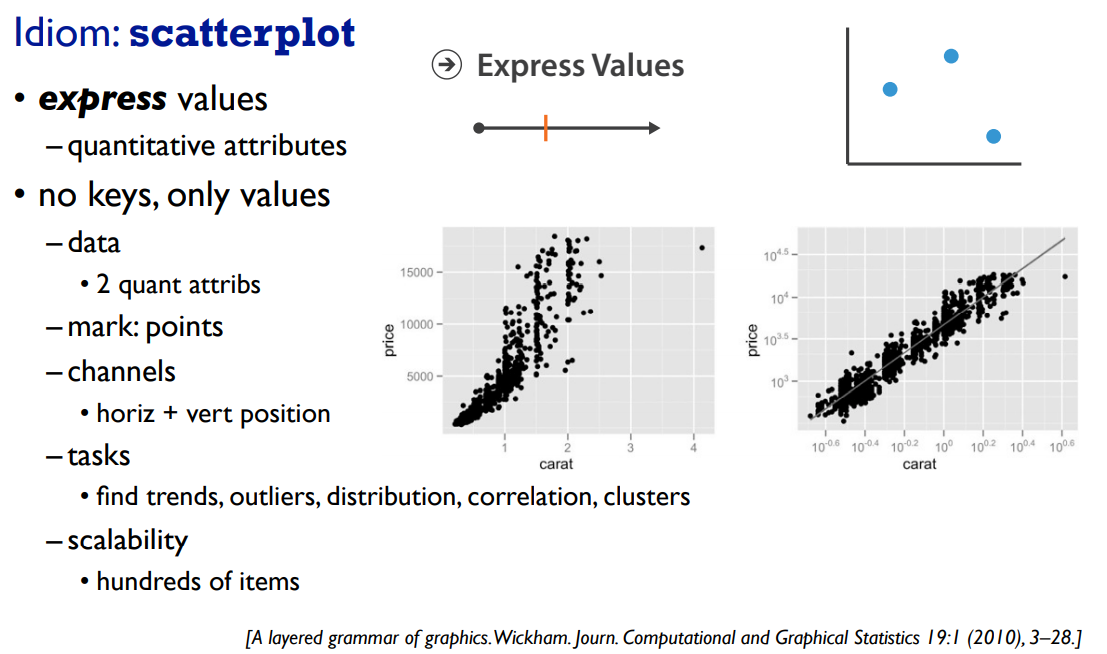

<cite>Scatter Plot — Matplotlib 3.3.4 Documentation. https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html. Accessed 14 Mar. 2021.</cite>

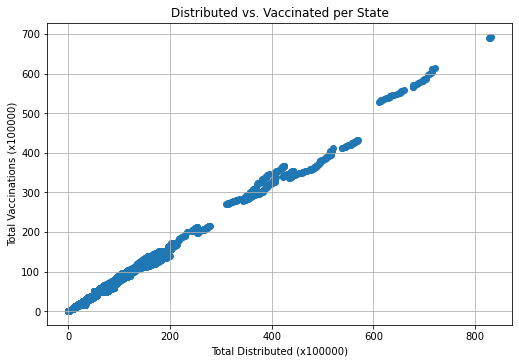

In [4]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(600*px, 400*px))

ax.scatter(data.total_distributed, data.total_vaccinations)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Total Distributed (x100000)' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Distributed vs. Vaccinated per State' )
ax.grid()

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

![Bar Chart Idiom](barchart.PNG)
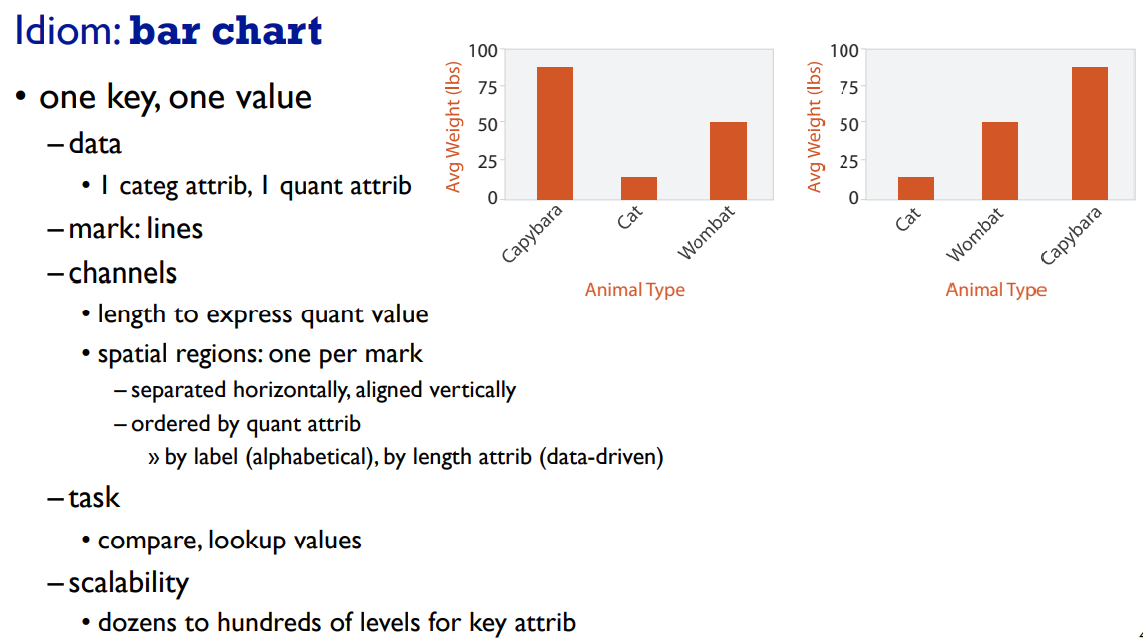

<cite>Grouped Bar Chart with Labels — Matplotlib 3.3.4 Documentation. https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html. Accessed 14 Mar. 2021.
</cite>

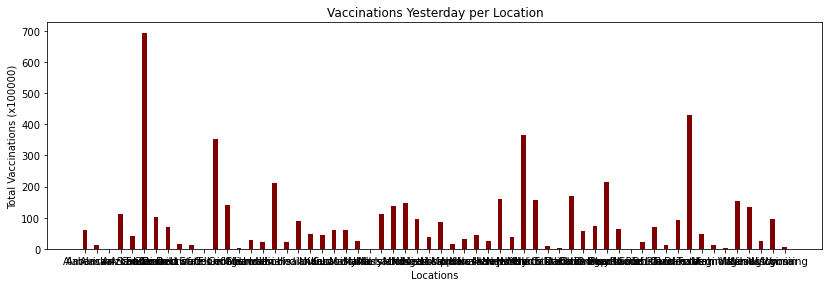

In [5]:
# creating the bar plot
yData = data[data.date==yesterdaysDate]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(yData.location, yData.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

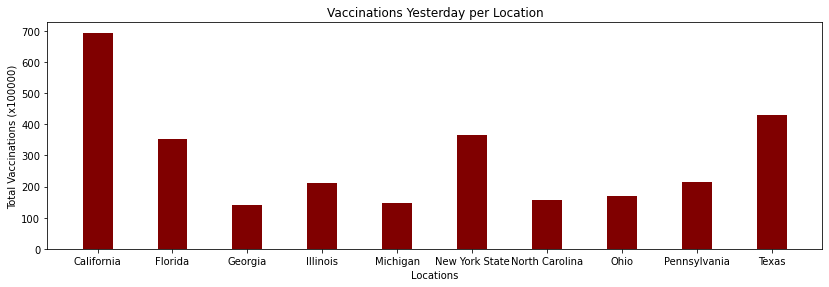

In [6]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]

top10Yest = yData[yData.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

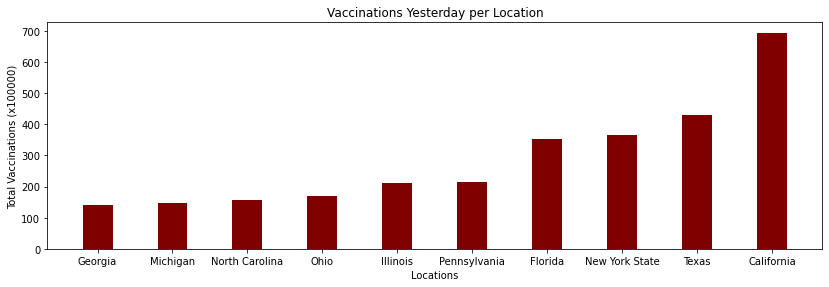

In [7]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]

sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )


### Paired Bar Chart

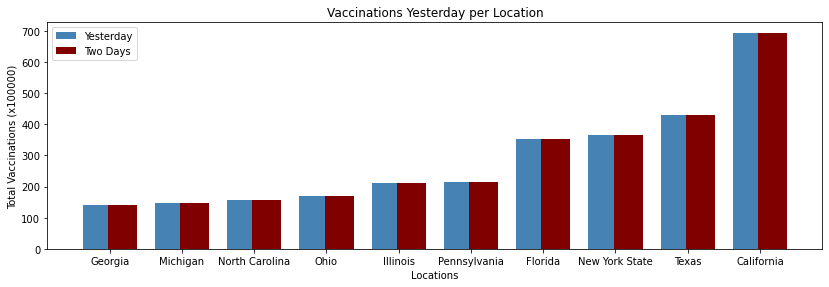

In [8]:
import numpy as np
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]
sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]

twoData = data[data.date==twoDays]
sortedData = twoData.sort_values(by=['total_vaccinations'])
top102days = sortedData[sortedData.location.isin(top10)]

x = np.arange(len(sortedData[sortedData.location.isin(top10)].location))  # the label locations
width = 0.35  # the width of the bars

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(x - width/2, top102days.total_vaccinations, color ='steelblue', width = 0.4, label="Yesterday")
ax.bar(x + width/2, top10Yest.total_vaccinations, color ='maroon', width = 0.4, label="Two Days")
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
ax.set_xticks(x)
ax.set_xticklabels(sortedData[sortedData.location.isin(top10)].location)

ax.legend()

plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

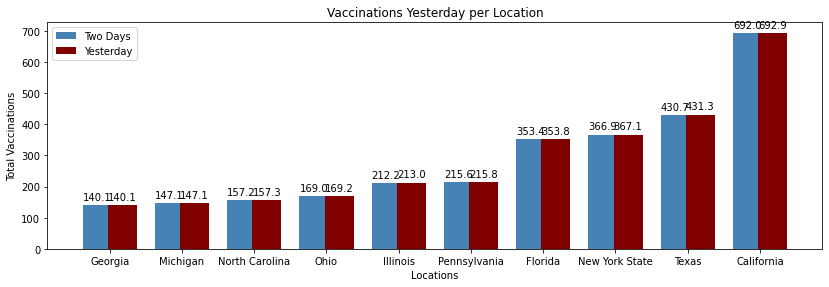

In [9]:
import numpy as np
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]
sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]

twoData = data[data.date==twoDays]
sortedData = twoData.sort_values(by=['total_vaccinations'])
top102days = sortedData[sortedData.location.isin(top10)]

x = np.arange(len(sortedData[sortedData.location.isin(top10)].location))  # the label locations
width = 0.35  # the width of the bars

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
rects1 = ax.bar(x - width/2, top102days.total_vaccinations, color ='steelblue', width = 0.4, label="Two Days")
rects2 = ax.bar(x + width/2, top10Yest.total_vaccinations, color ='maroon', width = 0.4, label="Yesterday")
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations' )
ax.set_xticks(x)
ax.set_xticklabels(sortedData[sortedData.location.isin(top10)].location)

ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )